#  XPCS   SAXS Pipeline 

 "This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

## NSLS2 data retrieval imports

In [2]:
%matplotlib notebook
#%matplotlib inline


In [3]:
cd /XF11ID/analysis/Analysis_Pipelines/Develop/

/XF11ID/analysis/Analysis_Pipelines/Develop


In [4]:
%run XPCS_SAXS.py
%run chx_generic_functions.py
%run Two_Time_Correlation_Function.py
%run speckle.py

/opt/conda_envs/analysis/lib/python3.4/site-packages/filestore/retrieve.py:15: UserWarning: Do not import filestore.retrieve, import filestore.api instead
  warnings.warn("Do not import filestore.retrieve, "


In [5]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [6]:
import os,sys

# Startup Setting

## Detector

In [7]:
detector = 'eiger4m_single_image'

In [8]:

path = '/home/yuzhang/Analysis/2016_1/Results/'
pathm = '/home/yuzhang/Analysis/2016_1/Results/'  #for read mask file
print ("The analysis results will be saved in : %s"%path)

dt =datetime.now()
CurTime = '%s%02d%02d-%02d%02d' % (dt.year, dt.month, dt.day,dt.hour,dt.minute)


#mask_name =  "March_colloidal"  +"_mask.npy"  #good for AuRod
mask_name = 'corapor407'+"_mask.npy"
mask_name = 'corapor416'+"_mask.npy"

#mask_name =  "March28_colloidal"  +"_mask.npy"

The analysis results will be saved in : /home/yuzhang/Analysis/2016_1/Results/


### Get the image series and metadata from the uid

In [9]:

uid = '60b2428f-e79d-4bdc-a5b7-6b13164bc6fb' 
sn = 'B1'

#hdr = db[uid]

In [10]:
if not os.path.exists(path+'%s'%(sn)):
    os.mkdir( path + sn )
    path = path + sn + '/'

In [11]:
start_time = '2016-04-15 23:25:00'
stop_time = '2016-04-16 02:00:00'

hdrs = db(start_time= start_time, stop_time = stop_time)
print ('Totally %s uids are found for this sample: %s'%(len(hdrs), sn))
sids=[]
uids=[]

Totally 43 uids are found for this sample: B1


In [12]:
for hdr in hdrs:
    s= get_sid_filenames( hdr)
    sids.append( s[0] )
    uids.append( s[1] )
sids=sids[::-1]
uids=uids[::-1]

In [142]:
i= 24
uid = uids[i]
sid = sids[i]
print (sid, uid)

14466 5382c328-0400-48e7-841f-da93aec1f02e


In [143]:
db[uid]['stop']

{'exit_status': 'success',
 'reason': '',
 'run_start': '5382c328-0400-48e7-841f-da93aec1f02e',
 'time': 1460782603.9773102,
 'uid': 'b70916fb-627e-4b32-90df-3cd4ddc3f489'}

In [144]:

#get_sid_filenames(db[uid])
#detectors = ['eiger4m_single_image', 'eiger1m_single_image', 'eiger4m_image', 'eiger1m_image']
imgs = load_data( uid, detector  )
md = imgs.md

hdf5 path = /XF11ID/data/2016/04/16/1adf7cd2-6f7b-4496-9684_4365_master.h5


In [145]:
imgs

<Frames>
Length: 500 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32

In [146]:
sampling = 10

In [147]:
uid = uid[:8] +'--%s_'%sn
print (uid)

5382c328--B1_


## Overwrite some metadata due to wrong input

In [148]:
md

{'beam_center_x': 1209.0,
 'beam_center_y': 1327.0,
 'count_time': 0.099990003,
 'detector_distance': 4.8400002,
 'frame_time': 0.1,
 'framerate': 9.9999998509883898,
 'incident_wavelength': 1.4251057,
 'pixel_mask': array([[1, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ..., 
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint32),
 'x_pixel_size': 7.5000004e-05,
 'y_pixel_size': 7.5000004e-05}

In [149]:
dpix =   0.075        #in eiger 4M, mm
Ldet = md['detector_distance'] *1000     #4840 in mm
lambda_  = md['incident_wavelength']  #1.4250998
timeperframe=md['frame_time']
#center = md['beam_center_x'], md['beam_center_y']
#center = [1212, 1487]  # center of the speckle pattern
center = [1217, 2167-536]  # center of the speckle pattern

center = [1217, 2167-536]  # center of the speckle pattern



center=[center[1], center[0]]
print (center)

[1631, 1217]


In [150]:
setup_pargs=dict(uid=uid, dpix= dpix, Ldet=Ldet, lambda_= lambda_, 
                 timeperframe=timeperframe, center=center, path = path)

In [151]:
setup_pargs

{'Ldet': 4840.0001525878906,
 'center': [1631, 1217],
 'dpix': 0.075,
 'lambda_': 1.4251057,
 'path': '/home/yuzhang/Analysis/2016_1/Results/',
 'timeperframe': 0.1,
 'uid': '5382c328--B1_'}

## Load Mask 

In [152]:
mask = load_mask( pathm, mask_name, plot_ =  False )

## Apply Mask to time-series

In [153]:
imgsa = apply_mask( imgs, mask )

In [154]:
#path ='/home/yuzhang/Analysis/2016_1/Results/B1/'

In [155]:
T=True
F=False

<IPython.core.display.Javascript object>


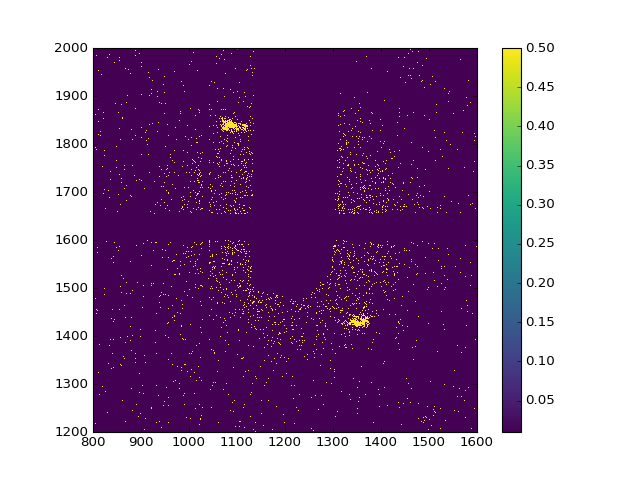

In [156]:
show_img( imgsa[0], vmin=.01, vmax=.5,  xlim= [ 800, 1600], ylim = [1200, 2000],
         save = F,  image_name=uid, path=path) 

In [142]:
#show_img( imgsa[0],  norm= LogNorm(vmin=.1, vmax=5)) 

## Check shutter open frame and get good time series

In [157]:
good_start = check_shutter_open( imgsa,  min_inten=5, time_edge = [0,1], plot_ = False )

The first frame with open shutter is : 0


In [158]:
good_series = apply_mask( imgs[good_start:], mask )
Nimg = len(good_series)

## Find bad frames by checking total scattering intensity 

<IPython.core.display.Javascript object>


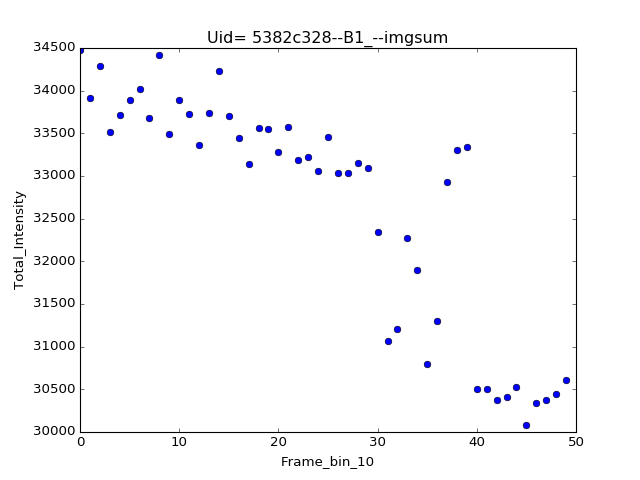

No bad frames are involved.


In [159]:
imgsum, bad_frame_list = get_each_frame_intensity(good_series ,sampling = sampling, 
                                bad_pixel_threshold=1e10,  plot_ = True, uid=uid)

## Get intensity average image

<IPython.core.display.Javascript object>


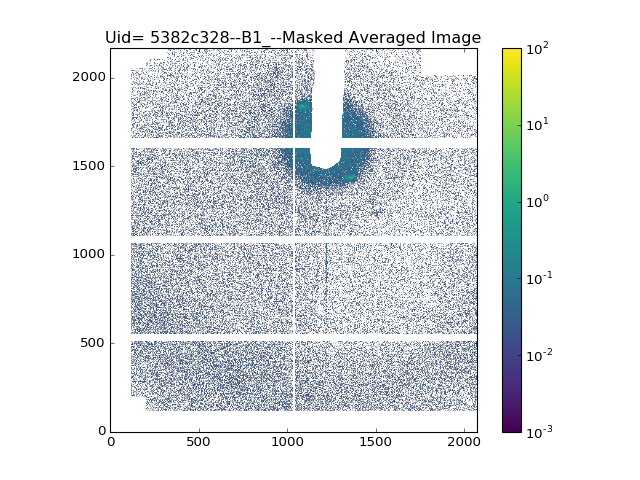

In [160]:
avg_img =  get_avg_img( good_series, sampling = sampling, plot_ = True, uid =uid)

#avg_img =  get_avg_img( good_series, sampling = 50, plot_ = True, uid =uid)

<IPython.core.display.Javascript object>


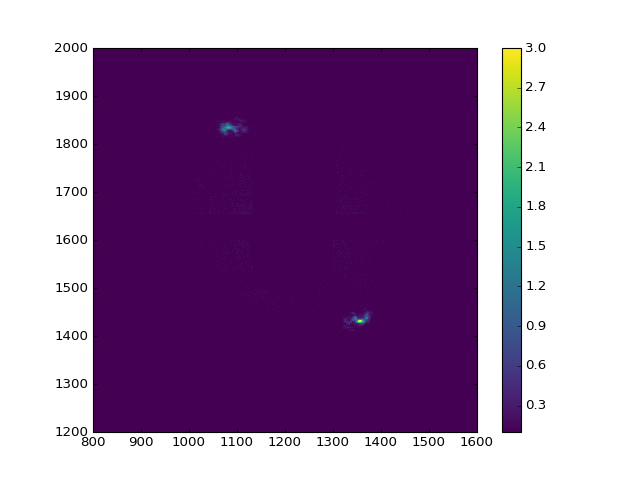

In [179]:
#show_img( avg_img, norm= LogNorm(vmin=.01, vmax=1 ) )
show_img( avg_img, vmin=.1, vmax=3,  xlim= [ 800, 1600], ylim = [1200, 2000],
         save =T,  image_name=uid, path=path) 

## Get circular average 

In [163]:
hmask = create_hot_pixel_mask( avg_img, 5000)

<IPython.core.display.Javascript object>


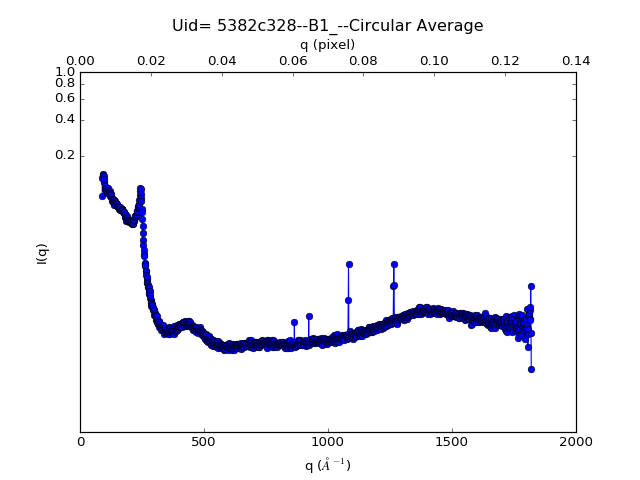

In [164]:
qp, iq, q = get_circular_average( avg_img, mask*hmask, pargs=setup_pargs,
                                plot_ = True, plot_qinpixel=False, save=True )

In [35]:
#214/161

## Create ring mask defined by  inner_radius, outer_radius, width, num_rings

In [165]:
ring_mask, q_ring_center, q_ring_val = get_ring_mask(  mask, inner_radius=120, outer_radius = 500,
                                         width = 2, num_rings = 12, pargs=setup_pargs   )

<IPython.core.display.Javascript object>


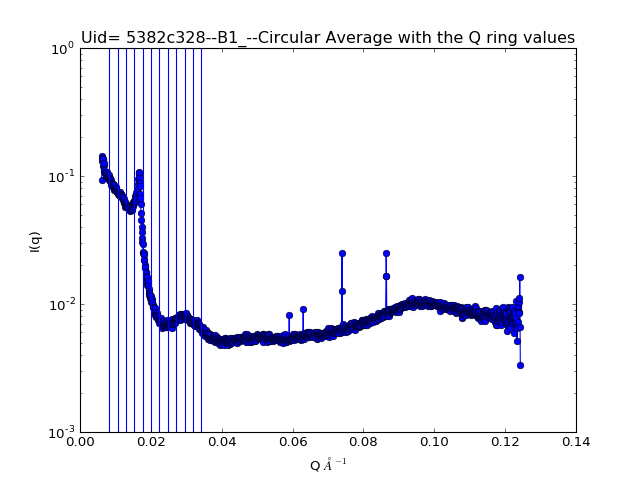

In [166]:
plot_qIq_with_ROI( q, iq, q_ring_center, logs=True, uid=uid)

In [38]:
#q_ring_center

## Check one ring intensity 

<IPython.core.display.Javascript object>


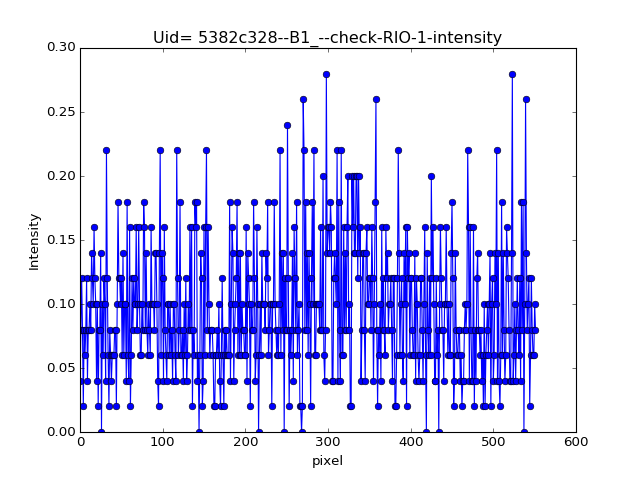

In [167]:
roi_inten = check_ROI_intensity( avg_img, ring_mask, ring_number= 1, uid =uid )

## Check beam damage
* check time~I(q)
* check mean intensity of each ring as a function of time

In [168]:
time_edge = create_time_slice( N=Nimg, slice_num= 3, slice_width=5, edges = None )

<IPython.core.display.Javascript object>


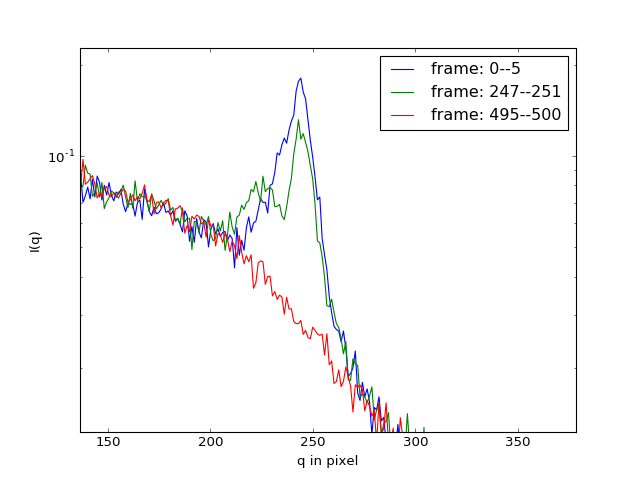

In [169]:
qp, iqs, q = get_t_iq( good_series, time_edge, mask*hmask, pargs=setup_pargs,
                      nx=1500,  plot_ = True, save=True,     )

## Redifine a good_series due a beam damage above 20 s

In [180]:
good_series = apply_mask( imgs[good_start:200], mask )
Nimg = len(good_series)

In [182]:
time_edge = create_time_slice( N=Nimg, slice_num= 3, slice_width=5, edges = None )

<IPython.core.display.Javascript object>


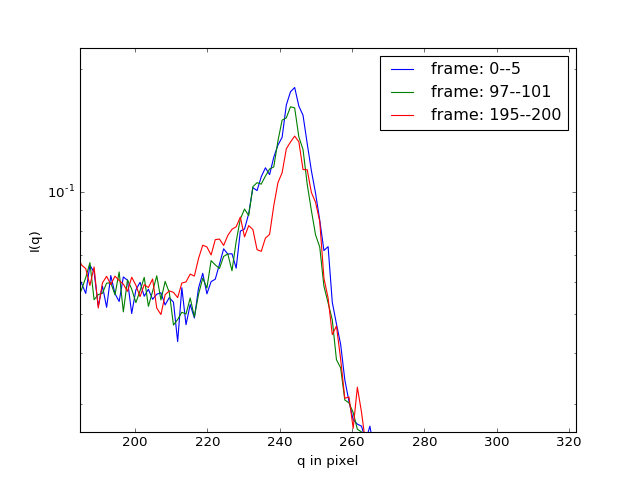

In [183]:
qp, iqs, q = get_t_iq( good_series, time_edge, mask*hmask, pargs=setup_pargs,
                      nx=1500,  plot_ = True, save=True,     )

<IPython.core.display.Javascript object>


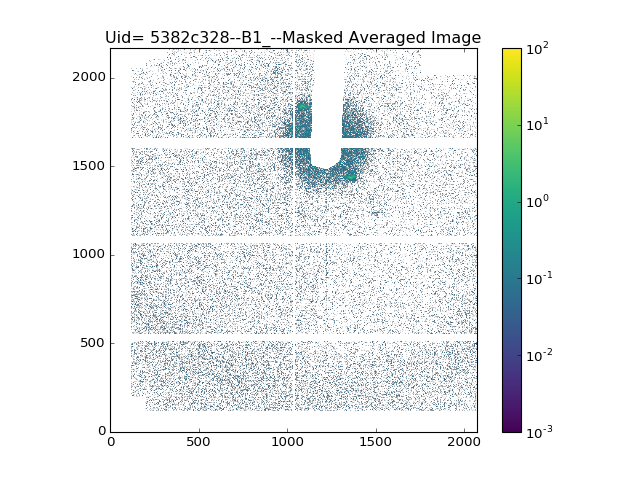

In [187]:
avg_img =  get_avg_img( good_series, sampling = sampling, plot_ = True, uid =uid)

<IPython.core.display.Javascript object>


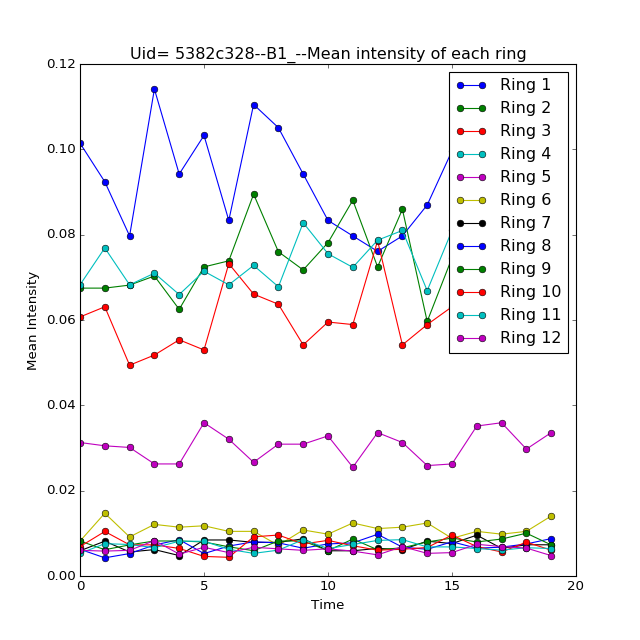

In [184]:
mean_int_sets = get_each_ring_mean_intensity(good_series, ring_mask, sampling = sampling,
                timeperframe = md['frame_time'], plot_ = True , save=True, uid =uid, path = path, )

# Get waterfall

In [43]:
max_inten_ring = np.argmax(  np.average( mean_int_sets[1], axis = 0 )  )

In [44]:
kymo = roi.kymograph(good_series[:: sampling], ring_mask, num = max_inten_ring)

<IPython.core.display.Javascript object>


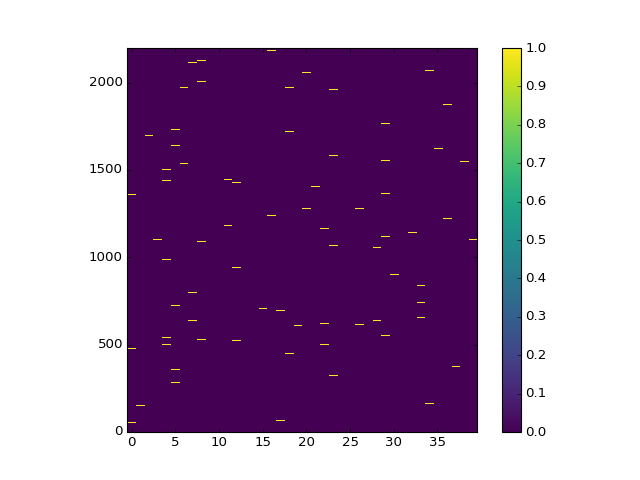

In [45]:
show_img( kymo.T, vmax=1.0, aspect = .02 )

# For Bragg spot
### Define a square shaped ROI

In [188]:
qw = 80

#qw = 80*2

#qw = 80*.5
qx1 = int( 1428- qw/2 )
qy1=   int( 1369  -qw/2 )

qx1 = int( 1432- qw/2 )
qy1=   int( 1356  -qw/2 )
#qregion = [ qx1:qx1+qw, qy1:qy1+qw ]
qreg_mask = np.zeros_like( avg_img, dtype = np.int32)
qreg_mask[ qx1:qx1+qw, qy1:qy1+qw ] = 1

qreg_mask_ = qreg_mask.copy()

<IPython.core.display.Javascript object>


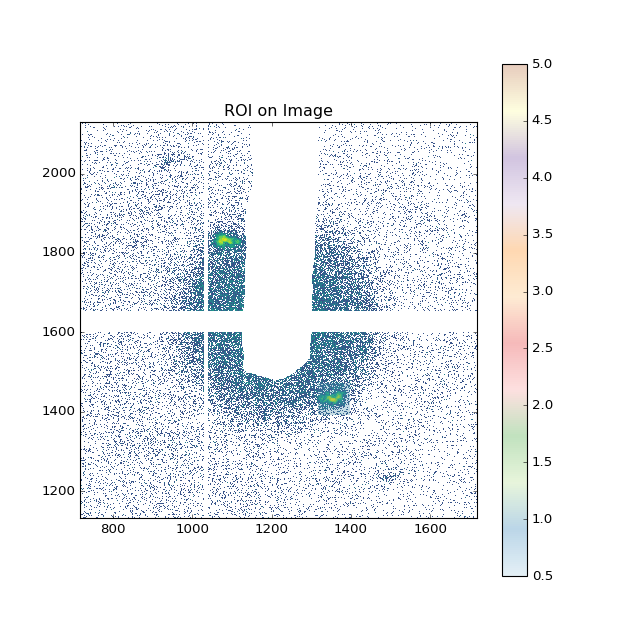

In [189]:
show_ROI_on_image( avg_img, qreg_mask, center = center, rwidth=500)

### i) Do analysis for the whole square reqion

In [190]:
#kymo = roi.kymograph(good_series[:: 1], qreg_mask, num = 1)
qind, pixelist = roi.extract_label_indices(  qreg_mask  )
t0 = time.time()
data_pixel =   Get_Pixel_Array( good_series , pixelist).get_data()
run_time(t0)

Total time: 0.10 min


<IPython.core.display.Javascript object>


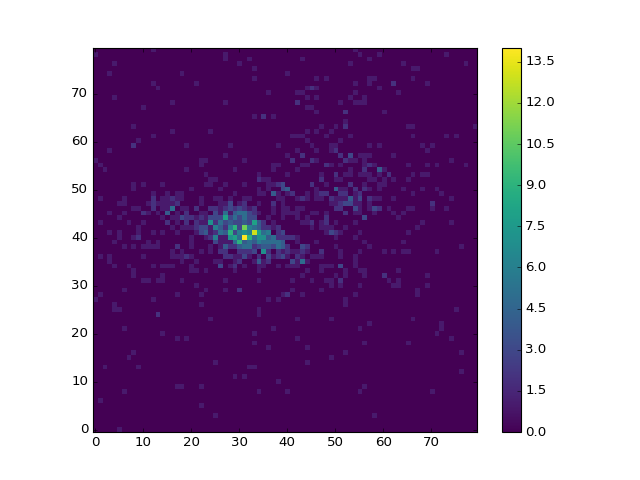

In [191]:
show_img( data_pixel[30].reshape( [80,80] ) )

In [192]:
mean_inten = get_mean_intensity( data_pixel, qind)

<IPython.core.display.Javascript object>


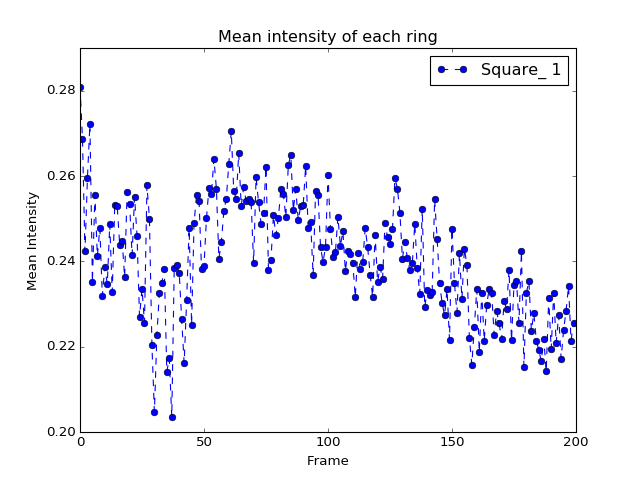

In [193]:

times = np.arange(  mean_inten[1].shape[0]   )  #*timeperframe  # get the time for each frame

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Mean intensity of each ring")
for i in range(1):
    ax.plot(times, mean_inten[i+1], '--o', label="Square_ "+str(i+1))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean Intensity")
ax.legend(loc='best') 
plt.show()

In [194]:
avg = np.average( data_pixel, axis=0).reshape( [qw,qw])

<IPython.core.display.Javascript object>


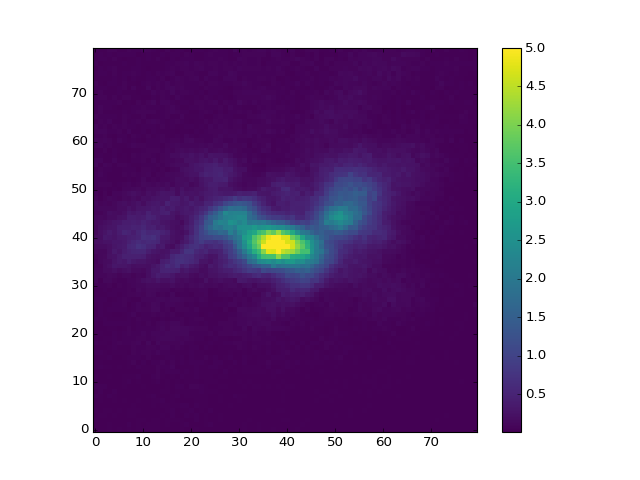

In [228]:
show_img( avg , vmax=5, vmin =.01)

### Time correlation analysis

Total time: 0.01 min


<IPython.core.display.Javascript object>


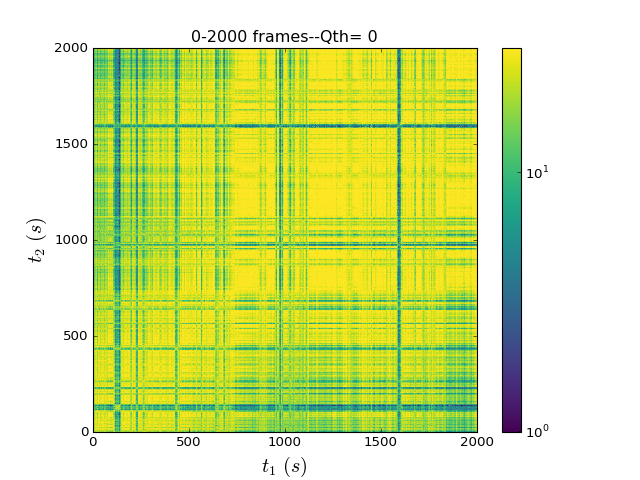

<IPython.core.display.Javascript object>


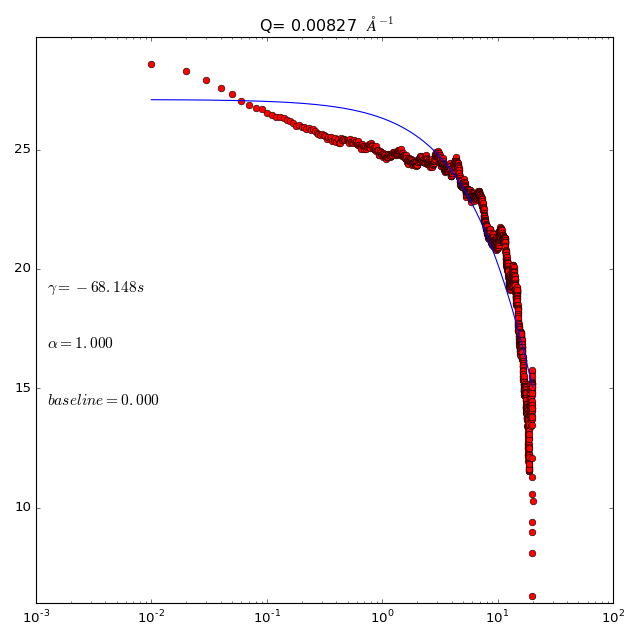

{'alpha': array([ 1.]),
 'baseline': array([  2.09077607e-06]),
 'beta': array([ 27.09442901]),
 'rate': array([-0.01467401])}

In [69]:
g12b = auto_two_Array( good_series,qreg_mask, data_pixel = data_pixel ) 
show_C12(g12b, q_ind=0, N1=0, N2=2000, vmin=.99, vmax=30.15,  )
g2b = get_one_time_from_two_time(g12b)
 
#plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[0.9, 31.3],
#             q_ring_center = q_ring_center, vlim=[.99, 1.01], uid=uid, path = path )

fit_saxs_g2( taus= np.arange( g2b.shape[0]) *timeperframe, g2= g2b , function='simple_exponential',
            uid=uid, path=path, q_ring_center=q_ring_center)

### Visibilty Analysis

In [196]:
K_mean = np.array( [mean_inten[i].mean() for i in  list(mean_inten.keys() )] )
print( K_mean )
max_cts = data_pixel.max()
print (max_cts)

[ 0.24051875]
19.0


In [197]:
spe_cts_all, std_dev = xsvs( (good_series,), np.int_(qreg_mask), timebin_num=2,
    number_of_img= len(good_series), max_cts=int(max_cts+2), bad_images=None, threshold = 5000 )

##########Total time: 0.15 min


/opt/conda_envs/analysis/lib/python3.4/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(8, 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [198]:
num_rings =1 
time_steps = utils.geometric_series(2,   len(good_series)   ) [:-3]
num_times = len( time_steps)
print (time_steps)
bin_edges, bin_centers, Knorm_bin_edges, Knorm_bin_centers = get_bin_edges(
      len(time_steps), num_rings, K_mean, int(max_cts+2)  )


[1, 2, 4, 8, 16]


In [199]:
#plot_sxvs( Knorm_bin_edges, spe_cts_all, uid,q_ring_center,xlim=[0,5.5] )

<IPython.core.display.Javascript object>


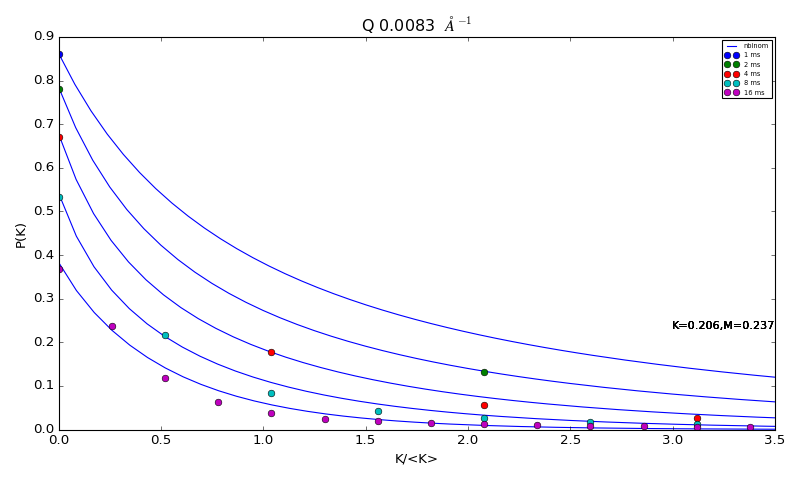

In [200]:
M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'bn',
             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)

In [201]:
print ([K_val[i][0] for i in range(num_rings)], K_mean)


[0.20613929636922018] [ 0.24051875]


In [236]:
contrast_factor[:,0]

array([ 1.48246378,  1.24369037,  1.02573415,  0.89447737,  0.80729598])

In [240]:
%run speckle.py

In [241]:
#plot_xsvs_g2?

<IPython.core.display.Javascript object>


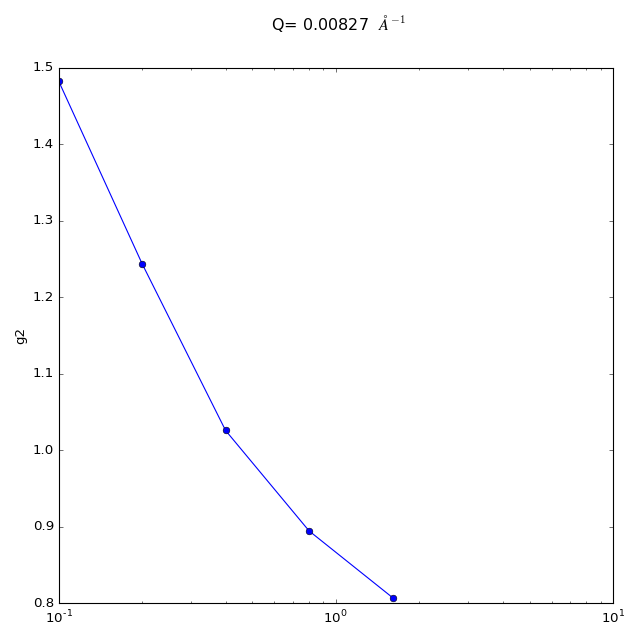

In [242]:
contrast_factor = np.zeros(( num_times,num_rings))

for i in range(num_times):
    for j in range(num_rings):
        contrast_factor[i, j] =  1/M_val[j][i]

plot_xsvs_g2( g2= contrast_factor, taus=np.array( time_steps ) * timeperframe, 
             uid=uid, q_ring_center = q_ring_center, path=path)        

In [234]:
#contrast_factor

<IPython.core.display.Javascript object>


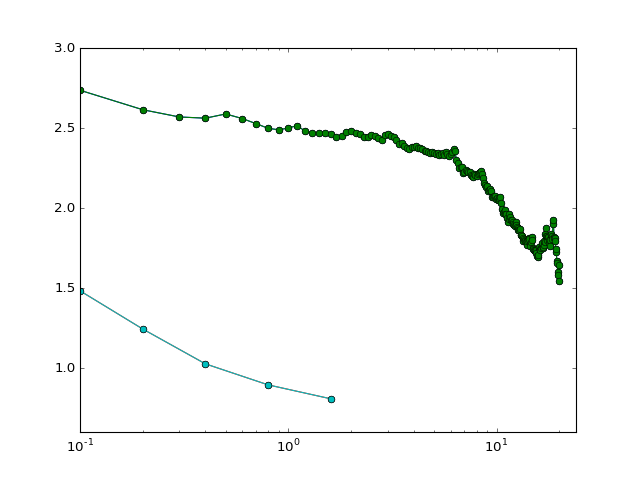

In [244]:
fig, ax = plt.subplots()
plot1D( x= np.arange( len(g2b) )*timeperframe, y= g2b,
           ax=ax, logx=True, ylim=[.6,3], xlim = [0,24] )
plot1D( x= np.array( time_steps ) * timeperframe, y=contrast_factor,
           ax=ax, logx=True, ylim=[.6,3], xlim = [0,24] ) 

### ii) Do analysis for the center Bragg spot

In [204]:
 %run '~/Analysis/2016_1/dev_423.py'

378.438029324 [  4.41438941  37.42817772  38.92062645   7.89133329   3.62941055
   0.21167821   0.11639445]
Area =  0.0245303807885


<IPython.core.display.Javascript object>


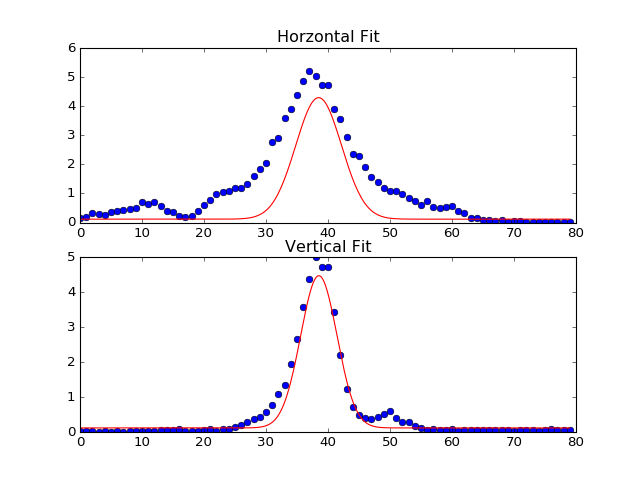

In [205]:
fp, ft = fit_two_Gaussian(avg, cx=40,cy=40,  initial_guess = (1., 41, 43, 7, 7, 0, 0),plot_= True  )

In [275]:
fp_= np.array([  1.82237915e+00,  40,   43,
         7,   5,  -1.54430736e-01,
         8.56659307e-03])

In [276]:
imgc_w = int( avg.shape[0]/2 )
x = np.linspace(0, imgc_w*2-1,  imgc_w*2 )
y = np.linspace(0, imgc_w*2-1,  imgc_w*2 )
x, y = np.meshgrid(x, y)
xy = np.array ( (x.ravel(),y.ravel()) ) 
#popt, pcov = opt.curve_fit(twoD_Gaussian, xy, avg.ravel(), p0=initial_guess)
df = (twoD_Gaussian( xy, *fp_)).reshape( [qw,qw])

<IPython.core.display.Javascript object>


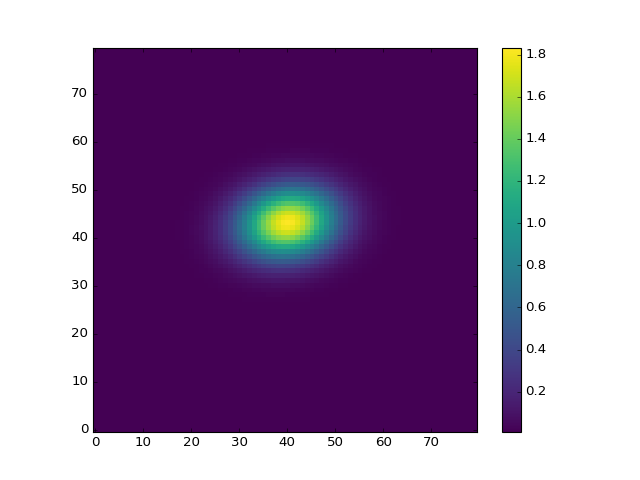

In [277]:
show_img(df )

<IPython.core.display.Javascript object>


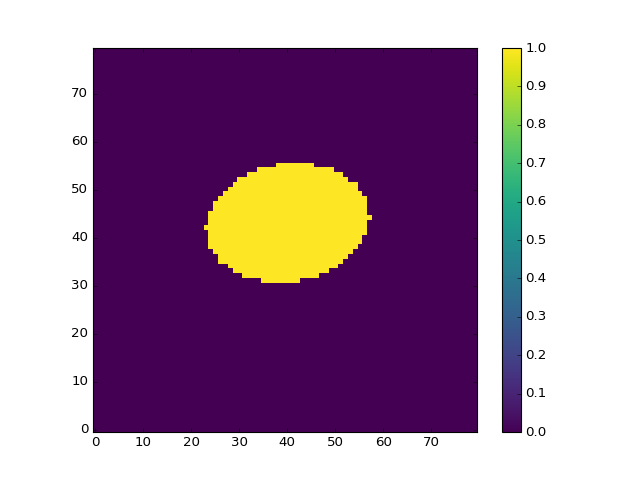

In [278]:
mask_guass = np.zeros_like( avg )
mask_guass[np.where( df > 0.1)] = 1
show_img( mask_guass)

In [258]:
#show_img( avg, vmax=2, vmin =.001)

<IPython.core.display.Javascript object>


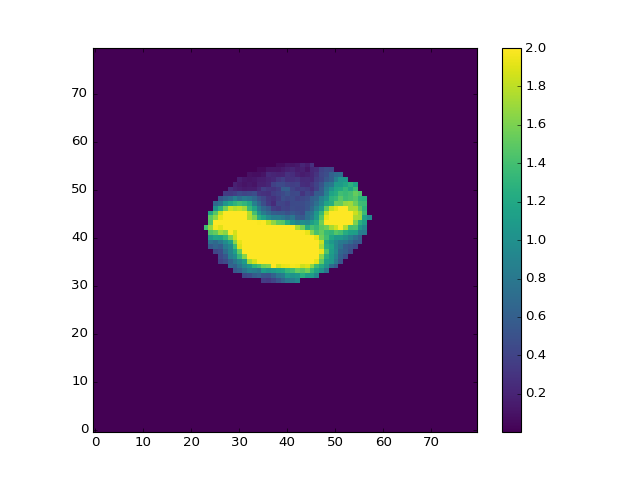

In [279]:
show_img( avg* mask_guass , vmax=2, vmin =.001)

In [280]:
qreg_mask = qreg_mask_.copy()
qreg_mask[np.where( qreg_mask )]= mask_guass.ravel()
#show_img( qreg_mask )

In [281]:
qind, pixelist = roi.extract_label_indices(  qreg_mask  )
t0 = time.time()
data_pixel =   Get_Pixel_Array( good_series , pixelist).get_data()
run_time(t0)

Total time: 0.09 min


<IPython.core.display.Javascript object>


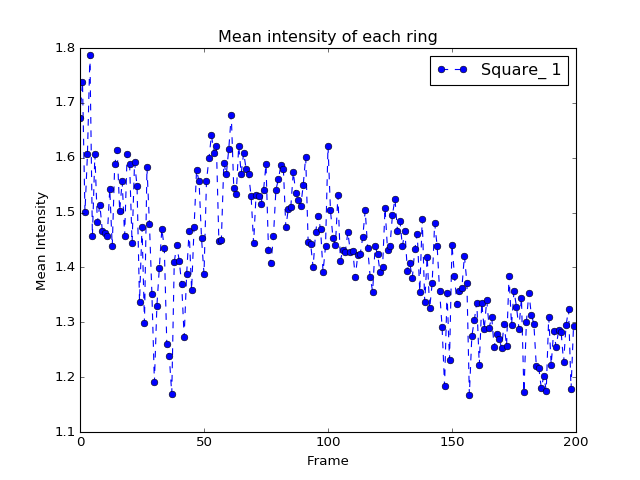

In [282]:
mean_inten = get_mean_intensity( data_pixel, qind)
times = np.arange(  mean_inten[1].shape[0]   )  #*timeperframe  # get the time for each frame
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Mean intensity of each ring")
for i in range(1):
    ax.plot(times, mean_inten[i+1], '--o', label="Square_ "+str(i+1))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean Intensity")
ax.legend(loc='best') 
plt.show()            
           

Total time: 0.00 min


<IPython.core.display.Javascript object>


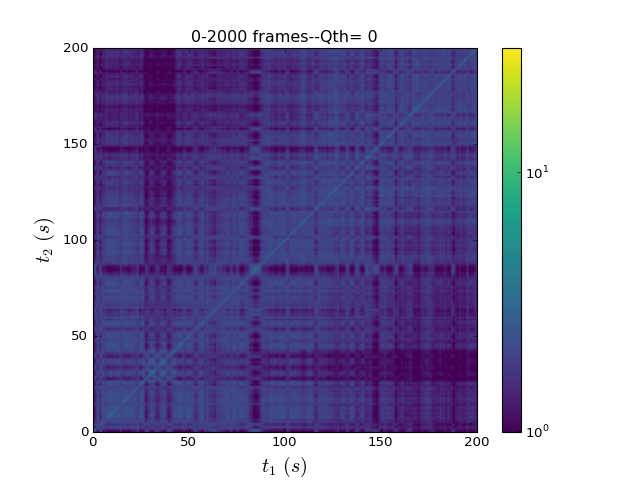

<IPython.core.display.Javascript object>


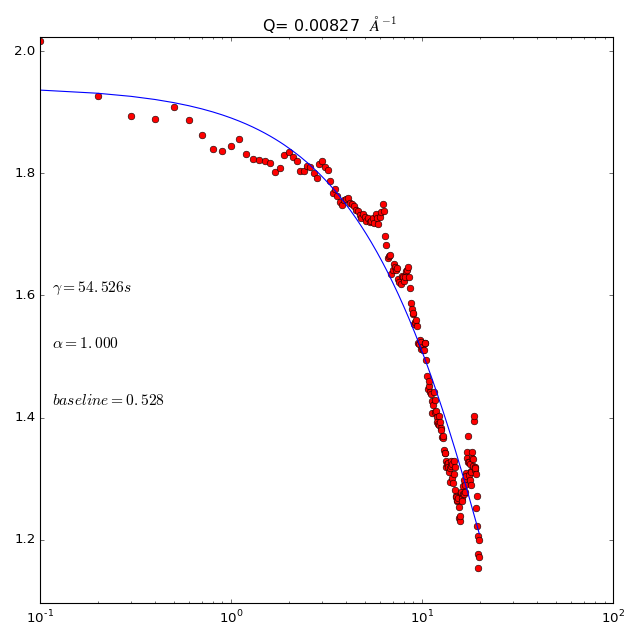

{'alpha': array([ 1.]),
 'baseline': array([ 0.52827176]),
 'beta': array([-1.41335619]),
 'rate': array([ 0.01833988])}

In [283]:
 g12b = auto_two_Array( good_series,qreg_mask, data_pixel = data_pixel ) 
show_C12(g12b, q_ind=0, N1=0, N2=2000, vmin=.99, vmax=30.15,  )
g2b = get_one_time_from_two_time(g12b) 
#plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[0.9, 31.3],
#             q_ring_center = q_ring_center, vlim=[.99, 1.01], uid=uid, path = path )
fit_saxs_g2( taus= np.arange( g2b.shape[0]) *timeperframe, g2= g2b , function='simple_exponential',
            uid=uid, path=path, q_ring_center=q_ring_center)

In [284]:
K_mean = np.array( [mean_inten[i].mean() for i in  list(mean_inten.keys() )] )
print( K_mean )
max_cts = data_pixel.max()
print (max_cts)
spe_cts_all, std_dev = xsvs( (good_series,), np.int_(qreg_mask), timebin_num=2,
    number_of_img= len(good_series), max_cts=int(max_cts+2), bad_images=None, threshold = 5000 )
    
    

[ 1.42742748]
19.0
##########Total time: 0.10 min


/opt/conda_envs/analysis/lib/python3.4/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(8, 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


[1, 2, 4, 8, 16]


<IPython.core.display.Javascript object>


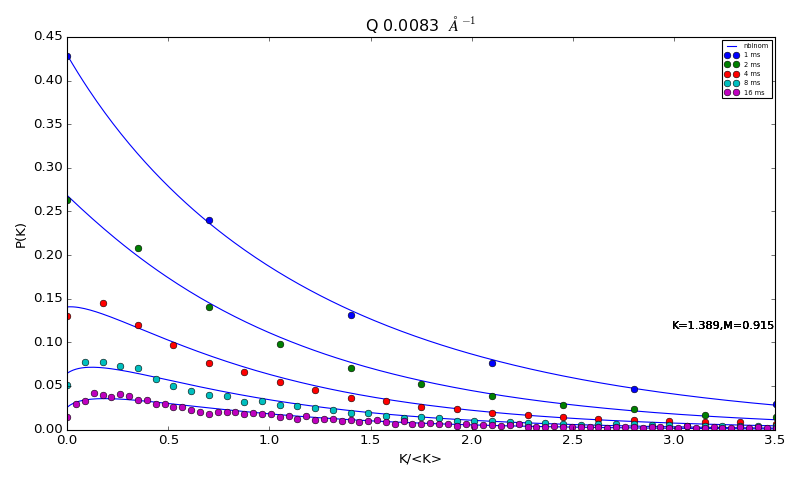

In [288]:
num_rings =1 
time_steps = utils.geometric_series(2,   len(good_series)   ) [:-3]
num_times = len( time_steps)
print (time_steps)
bin_edges, bin_centers, Knorm_bin_edges, Knorm_bin_centers = get_bin_edges(
      len(time_steps), num_rings, K_mean, int(max_cts+2)  )
      
M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'bn',
             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)  
             

[1.3889682892393376] [ 1.42742748]


<IPython.core.display.Javascript object>


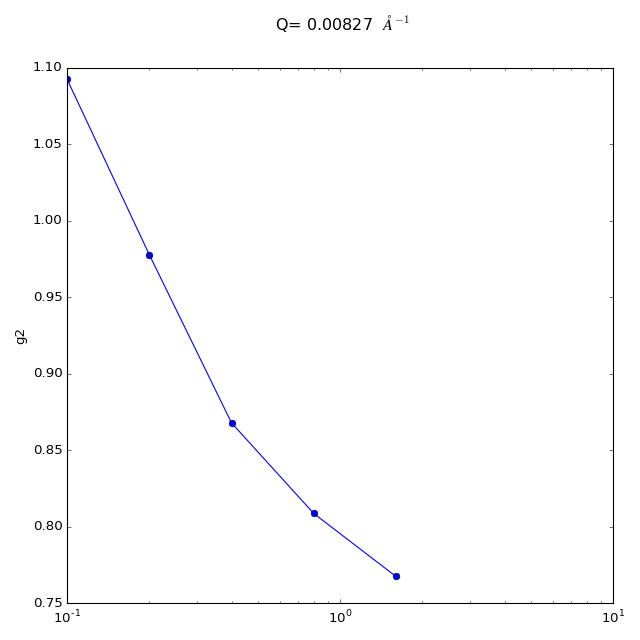

In [289]:
             
print ([K_val[i][0] for i in range(num_rings)], K_mean)

contrast_factor = np.zeros(( num_times,num_rings))

for i in range(num_times):
    for j in range(num_rings):
        contrast_factor[i, j] =  1/M_val[j][i]

plot_xsvs_g2( g2= contrast_factor, taus=np.array( time_steps ) * timeperframe, 
             uid=uid, q_ring_center = q_ring_center, path=path)   

<IPython.core.display.Javascript object>


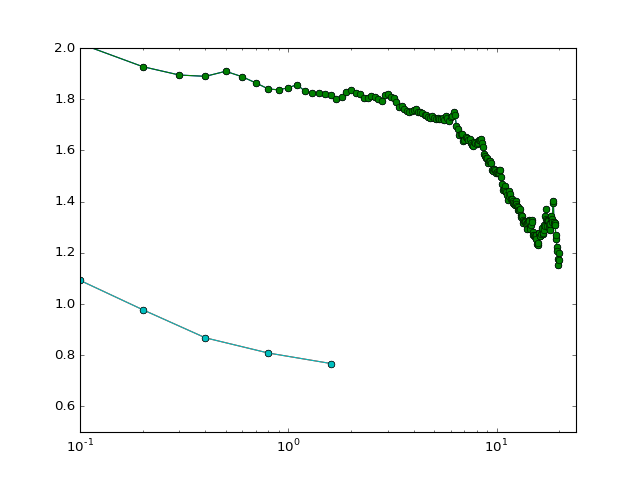

In [291]:
fig, ax = plt.subplots()
plot1D( x= np.arange( len(g2b) )*timeperframe, y= g2b,
           ax=ax, logx=True, ylim=[.5,2], xlim = [0,24] )
plot1D( x= np.array( time_steps ) * timeperframe, y=contrast_factor,
           ax=ax, logx=True, ylim=[.5,2], xlim = [0,24] ) 
            
            
            

### iii) Do analysis for near the center Bragg spot

<IPython.core.display.Javascript object>


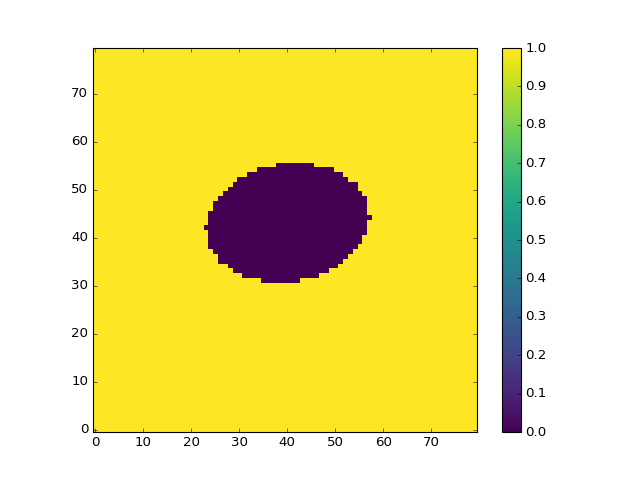

In [292]:
mask_guass = np.ones_like( avg )
mask_guass[np.where( df > 0.1)] = 0
show_img( mask_guass)

<IPython.core.display.Javascript object>


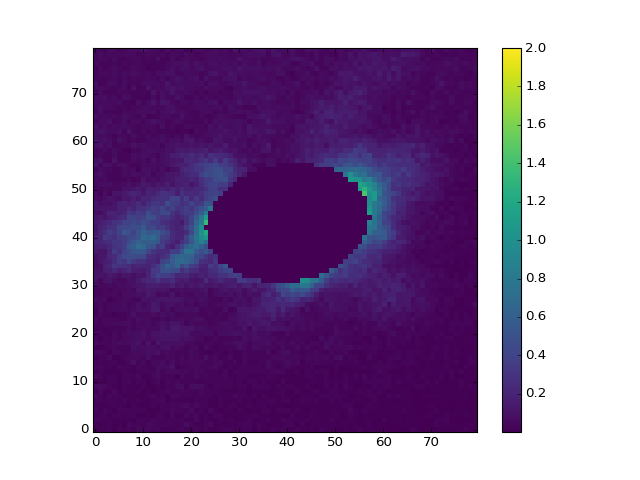

In [298]:
show_img( avg* mask_guass , vmax=2, vmin =.001)

In [299]:
qind, pixelist = roi.extract_label_indices(  qreg_mask  )
t0 = time.time()
data_pixel =   Get_Pixel_Array( good_series , pixelist).get_data()
run_time(t0)

Total time: 0.09 min


<IPython.core.display.Javascript object>


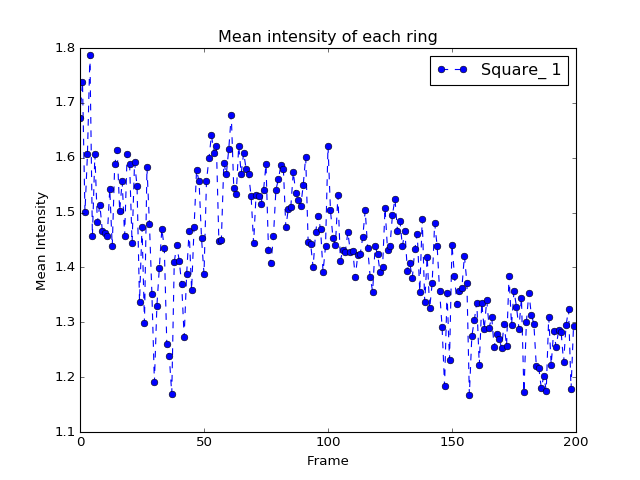

In [301]:
mean_inten = get_mean_intensity( data_pixel, qind)
times = np.arange(  mean_inten[1].shape[0]   )  #*timeperframe  # get the time for each frame
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Mean intensity of each ring")
for i in range(1):
    ax.plot(times, mean_inten[i+1], '--o', label="Square_ "+str(i+1))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean Intensity")
ax.legend(loc='best') 
plt.show()            
      

In [222]:
      
            
g12b = auto_two_Array( good_series, qreg_mask, data_pixel = data_pixel ) 
show_C12(g12b, q_ind=0, N1=0, N2=2000, vmin=.99, vmax=30.15,  )
g2b = get_one_time_from_two_time(g12b) 
#plot_saxs_g2( g2b, taus= np.arange( g2b.shape[0]) *timeperframe, ylim=[0.9, 31.3],
#             q_ring_center = q_ring_center, vlim=[.99, 1.01], uid=uid, path = path )
fit_saxs_g2( taus= np.arange( g2b.shape[0]) *timeperframe, g2= g2b , function='simple_exponential',
            uid=uid, path=path, q_ring_center=q_ring_center)

Total time: 0.00 min


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'alpha': array([ 1.]),
 'baseline': array([ 0.8536019]),
 'beta': array([-1.775664]),
 'rate': array([ 0.01976097])}

In [302]:
K_mean = np.array( [mean_inten[i].mean() for i in  list(mean_inten.keys() )] )
print( K_mean )
max_cts = data_pixel.max()
print (max_cts)
spe_cts_all, std_dev = xsvs( (good_series,), np.int_(qreg_mask), timebin_num=2,
    number_of_img= len(good_series), max_cts=int(max_cts+2), bad_images=None, threshold = 5000 )
    
    

[ 1.42742748]
19.0
##########Total time: 0.08 min


/opt/conda_envs/analysis/lib/python3.4/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full(8, 2) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


[1, 2, 4, 8, 16]


<IPython.core.display.Javascript object>


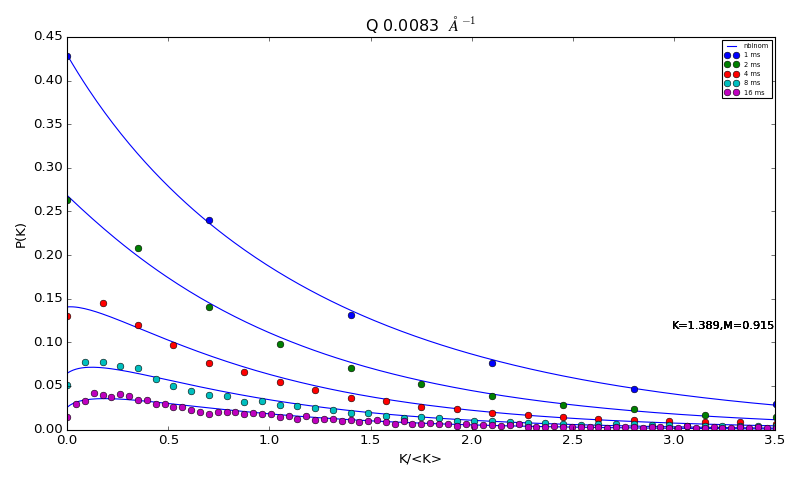

In [303]:
num_rings =1 
time_steps = utils.geometric_series(2,   len(good_series)   ) [:-3]
num_times = len( time_steps)
print (time_steps)
bin_edges, bin_centers, Knorm_bin_edges, Knorm_bin_centers = get_bin_edges(
      len(time_steps), num_rings, K_mean, int(max_cts+2)  )
      
M_val, K_val = fit_xsvs( Knorm_bin_edges, bin_edges, spe_cts_all, K_mean=K_mean,func= 'bn',
             uid=uid,q_ring_center=q_ring_center,xlim=[0,3.5],threshold=None, time_steps=time_steps)  
             
             

[1.3889682892393376] [ 1.42742748]


<IPython.core.display.Javascript object>


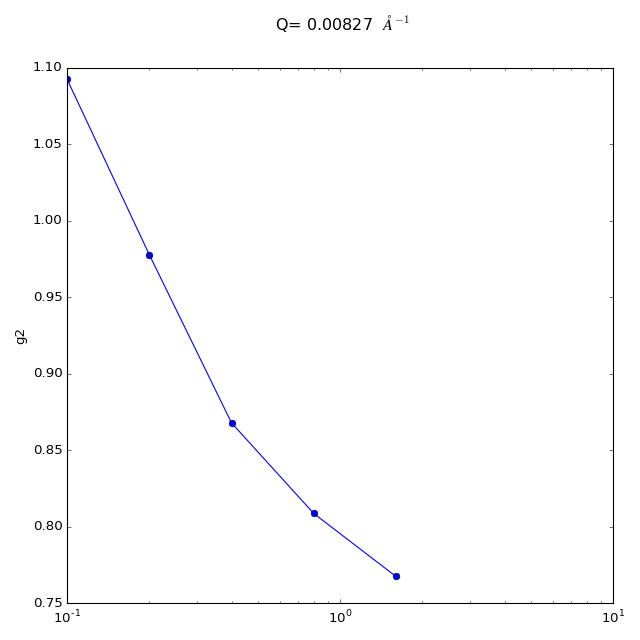

In [304]:
print ([K_val[i][0] for i in range(num_rings)], K_mean)

contrast_factor = np.zeros(( num_times,num_rings))

for i in range(num_times):
    for j in range(num_rings):
        contrast_factor[i, j] =  1/M_val[j][i]

plot_xsvs_g2( g2= contrast_factor, taus=np.array( time_steps ) * timeperframe, 
             uid=uid, q_ring_center = q_ring_center, path=path)   

<IPython.core.display.Javascript object>


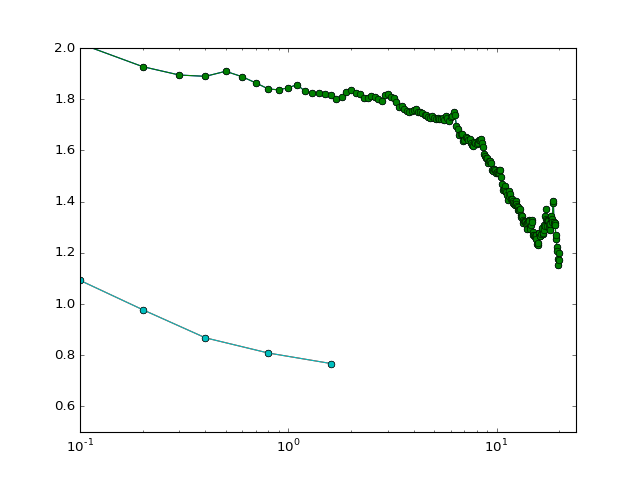

In [306]:
fig, ax = plt.subplots()
plot1D( x= np.arange( len(g2b) )*timeperframe, y= g2b,
           ax=ax, logx=True, ylim=[.5,2], xlim = [0,24] )
plot1D( x= np.array( time_steps ) * timeperframe, y=contrast_factor,
           ax=ax, logx=True, ylim=[.5,2], xlim = [0,24] ) 
            
            

## iV) A cut of Bragg spot

In [307]:
qind, pixelist = roi.extract_label_indices(  qreg_mask_  )
t0 = time.time()
data_pixel =   Get_Pixel_Array( good_series , pixelist).get_data()
run_time(t0)

Total time: 0.09 min


In [100]:
#show_img( data_pixel[30].reshape( [80,80] ) )

<IPython.core.display.Javascript object>


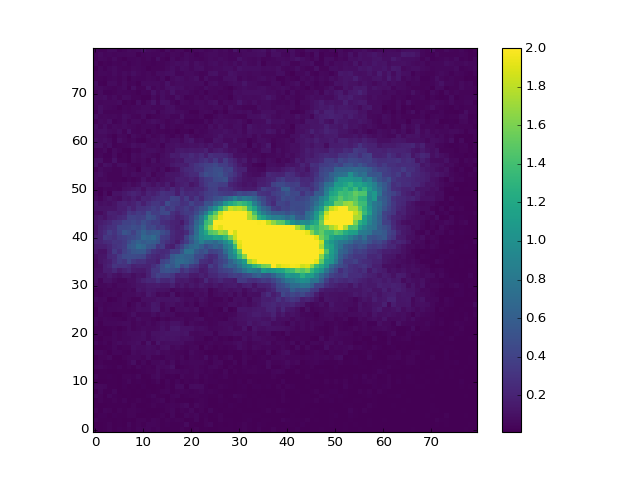

In [308]:
avg = np.average( data_pixel, axis=0).reshape( [qw,qw])
show_img( avg , vmax=2, vmin =.01)

In [309]:
pixelist_qi =  np.where( qind == 1)[0]         
kymo = data_pixel[:,pixelist_qi]

<IPython.core.display.Javascript object>


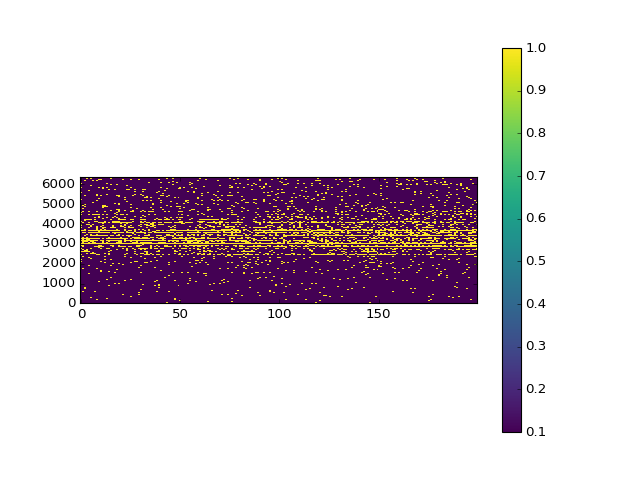

In [312]:
show_img( kymo.T, vmin=.1, vmax=1.0, aspect = .01)

In [313]:
kt = np.average(kymo, axis = 0 )

<IPython.core.display.Javascript object>


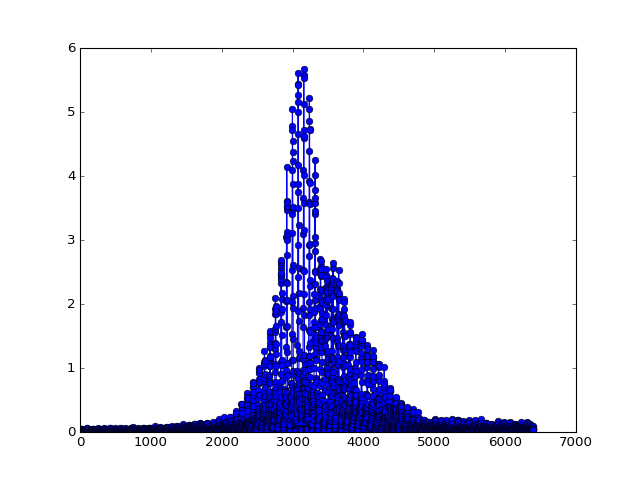

In [314]:
plot1D( kt, )

<IPython.core.display.Javascript object>


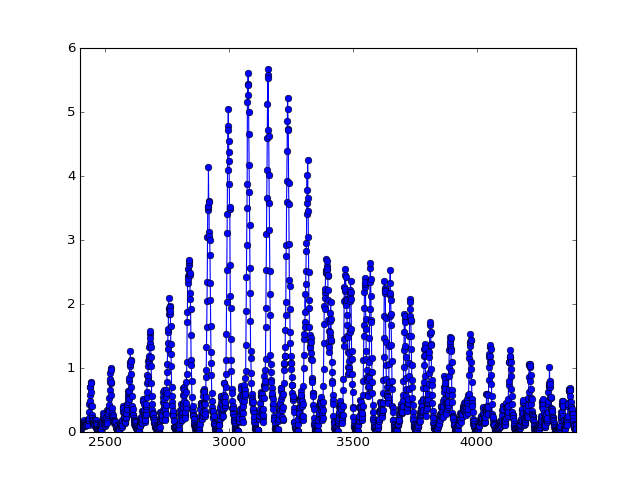

In [315]:
plot1D( kt, xlim=[  2400, 4400 ], save=True, plot_name = uid + 'waterfall_1D_box', path = path )

In [107]:
#plot1D( kt, xlim=[3210, 3270], save=True, plot_name = uid + 'waterfall_1D_smaller_box', path = path )

<IPython.core.display.Javascript object>


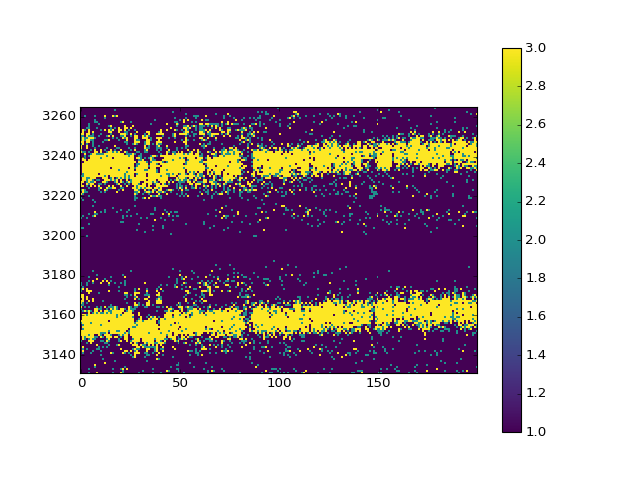

In [318]:
show_img( kymo.T, vmin=3, vmax=1.0, aspect = 1 , ylim = [3131, 3265] )

In [109]:
#std = np.std(  data_pixel, axis = 0)
#mean = np.mean(  data_pixel, axis = 0)

### define ROI of waterfall

In [110]:
#%run '~/Analysis/2016_1/dev_423.py'

In [328]:
pw=3
pc = 3237

In [329]:
yn= [ data_pixel[:,pc-pw + qw*n: pc+pw + qw*n] for n in range(-10,10) ]

<IPython.core.display.Javascript object>


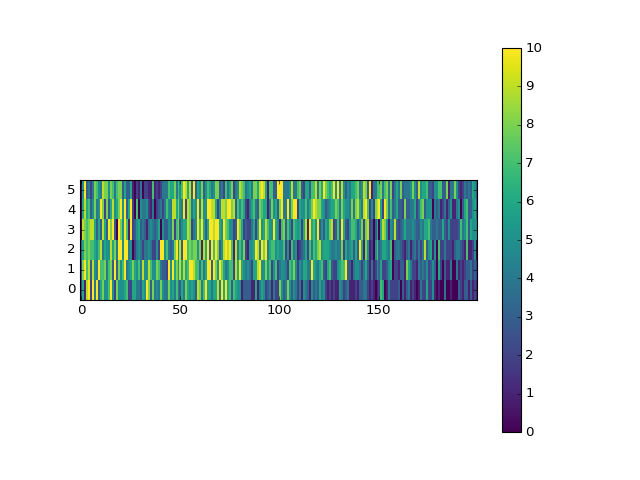

In [330]:
show_img(yn[8].T, aspect=10, vmax=10)

In [331]:
ydn =[ auto_correlation_2d( yn[i],yn[i]) for i in range(0,20)   ]

<IPython.core.display.Javascript object>


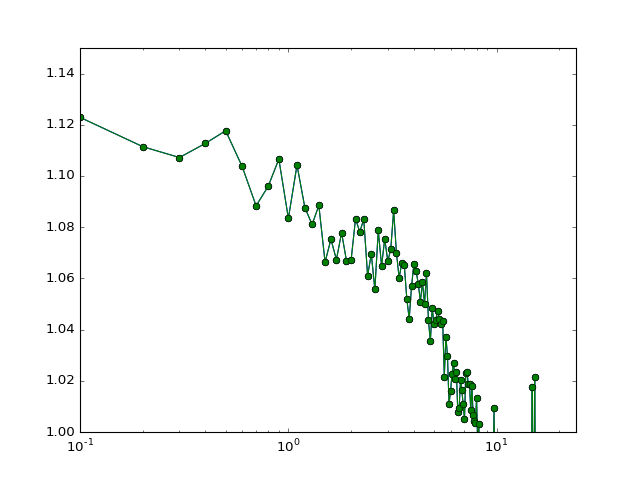

In [325]:
plot1D( x= np.arange( len(yn[1]) )*timeperframe, y= ydn[8], logx=True, ylim=[1.,1.15], xlim = [0,24] )

<IPython.core.display.Javascript object>


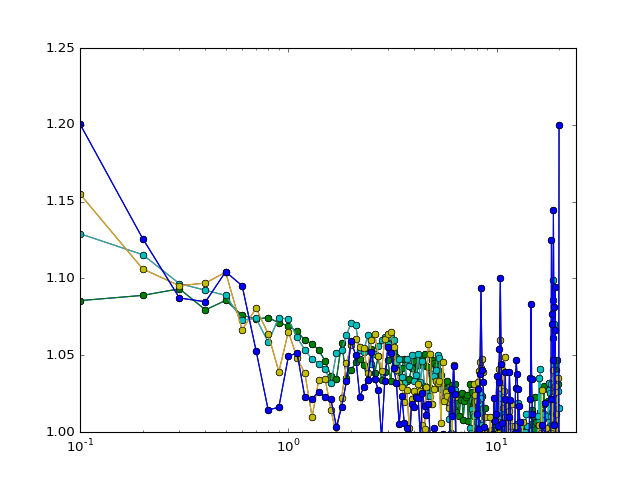

In [332]:
fig, ax = plt.subplots()
for i in range(8,12):
    plot1D( x= np.arange( len(yn[1]) )*timeperframe, y= ydn[i],
           ax=ax, logx=True, ylim=[1.,1.25], xlim = [0,24] )

<IPython.core.display.Javascript object>


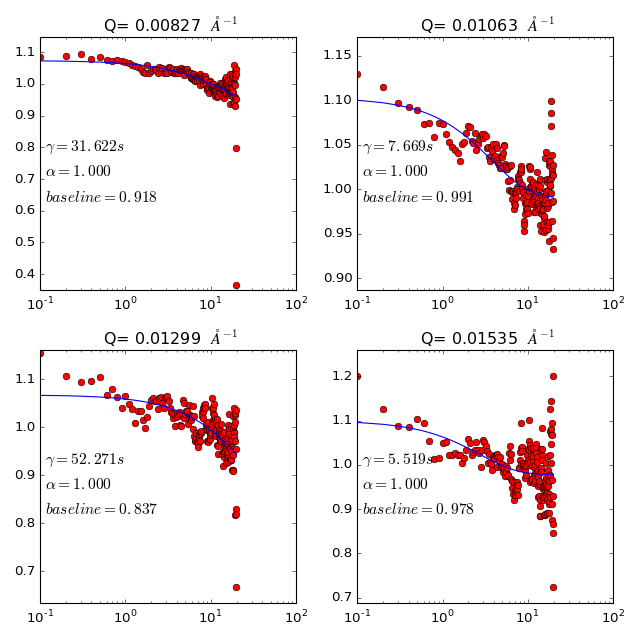

{'alpha': array([ 1.,  1.,  1.,  1.]),
 'baseline': array([ 0.91799943,  0.99052651,  0.8371921 ,  0.97841358]),
 'beta': array([ 0.1554544 ,  0.11239267,  0.23016227,  0.12169598]),
 'rate': array([ 0.03162361,  0.13040279,  0.01913091,  0.18118198])}

In [333]:
g2a= np.vstack( [ydn[8], ydn[9], ydn[10], ydn[11]] ).T

fit_saxs_g2( taus= np.arange( len(yn[1]) )*timeperframe, g2= g2a , function='simple_exponential',
            uid=uid, path=path, q_ring_center=q_ring_center)

In [334]:
#y1 =  data_pixel[:,pc-pw -qw: pc+pw -qw]
#y2 =  data_pixel[:,pc-pw: pc+pw]
#y3 =  data_pixel[:,pc-pw+qw: pc+pw+qw]

In [335]:
#yd1 = auto_correlation_2d( y1,y1 )
#yd2 = auto_correlation_2d( y2,y2 )
#yd3 = auto_correlation_2d( y3,y3 )

<IPython.core.display.Javascript object>


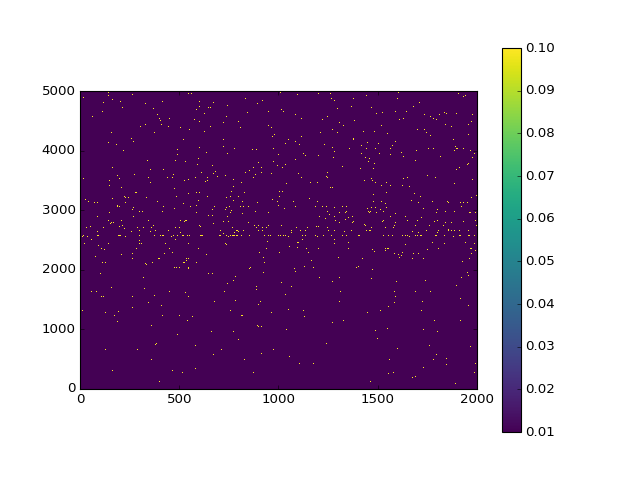

In [198]:
diff = np.hstack( [data_pixel[:,:2500] , data_pixel[:,-2500:]] )
show_img( diff.T, vmin=0.01, vmax=.1, aspect= .3)

In [200]:
yn[8].shape, diff.shape

((2000, 6), (2000, 5000))

In [48]:
#ydiff = auto_correlation_2d( diff, diff)   

In [ ]:
fit_saxs_g2( taus= np.arange( len(yn[1]) )*timeperframe, g2= ydiff , function='simple_exponential',
            uid=uid, path=path, q_ring_center=q_ring_center)

# The End!